<a href="https://colab.research.google.com/github/Suchi0506/Time-Series-Analysis/blob/main/Copy_of_ASMA_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving asma_updated_sales.csv to asma_updated_sales.csv


In [ ]:
!pip install xlrd

In [ ]:
df = pd.read_csv('asma_updated_sales.csv', encoding='ISO-8859-1')

In [ ]:
df.head()

,NAME,T_MONTH,LEV1GRPNAME,LEV2GRPNAME,GRPNAME,SUM(I.QTY),SUM(I.TAXABLEAMT),CNAME3,DISCOUNT,MRP,TAX_AMT
0,Asma Jayanagar,01-03-2019,WOMENS,APPARELS,GOWN,4.0,30004.46,UNDEFINED,0.0,33605.0,3600.54
1,Asma Jayanagar,01-03-2019,WOMENS,APPARELS,ANARKALI,2.0,8910.72,2083,0.0,9980.0,1069.28
2,Asma Jayanagar,01-03-2019,WOMENS,APPARELS,STRAIGHTCUT,1.0,3995.54,3424,0.0,4475.0,479.46
3,Gtx-Jayanagar,01-03-2019,MENS,APPARELS,SHORT KURTA,15.0,13142.90,UNDEFINED,0.0,8280.0,657.10
4,Gtx-Jayanagar,01-03-2019,MENS,FABRIC,SHIRTING,8.6,8471.42,GREEN,0.0,5240.0,423.58


In [ ]:
df['T_MONTH'] = pd.to_datetime(df['T_MONTH'], format= ('%d-%m-%Y'))

In [ ]:
df.sort_values(by = 'T_MONTH', inplace = True)

In [ ]:
df.reset_index(drop = True, inplace = True)

In [ ]:
df.head()

,NAME,T_MONTH,LEV1GRPNAME,LEV2GRPNAME,GRPNAME,SUM(I.QTY),SUM(I.TAXABLEAMT),CNAME3,DISCOUNT,MRP,TAX_AMT
0,Asma-Malleswaram,2019-02-01,MENS,APPARELS,KP SET,1.0,2674.10,SILK KURTAS,0.0,2995.0,320.90
1,Asma Jayanagar,2019-03-01,WOMENS,APPARELS,GOWN,4.0,30004.46,UNDEFINED,0.0,33605.0,3600.54
2,Asma-Malleswaram,2019-03-01,WOMENS,APPARELS,ANARKALI,3.0,17316.98,MIGRATE,0.0,19395.0,2078.02
3,Asma Jayanagar,2019-03-01,WOMENS,FABRIC,DRESS MATERIAL,4.0,15104.80,MOD-TRIBAL,0.0,15860.0,755.20
4,Asma Jayanagar,2019-03-01,WOMENS,APPARELS,CROP TOP,1.0,11812.50,DNO.1168,0.0,13230.0,1417.50


In [ ]:
df.set_index('T_MONTH', inplace = True)

In [ ]:
df.head()

,NAME,LEV1GRPNAME,LEV2GRPNAME,GRPNAME,SUM(I.QTY),SUM(I.TAXABLEAMT),CNAME3,DISCOUNT,MRP,TAX_AMT
T_MONTH,,,,,,,,,,
2019-02-01,Asma-Malleswaram,MENS,APPARELS,KP SET,1.0,2674.10,SILK KURTAS,0.0,2995.0,320.90
2019-03-01,Asma Jayanagar,WOMENS,APPARELS,GOWN,4.0,30004.46,UNDEFINED,0.0,33605.0,3600.54
2019-03-01,Asma-Malleswaram,WOMENS,APPARELS,ANARKALI,3.0,17316.98,MIGRATE,0.0,19395.0,2078.02
2019-03-01,Asma Jayanagar,WOMENS,FABRIC,DRESS MATERIAL,4.0,15104.80,MOD-TRIBAL,0.0,15860.0,755.20
2019-03-01,Asma Jayanagar,WOMENS,APPARELS,CROP TOP,1.0,11812.50,DNO.1168,0.0,13230.0,1417.50


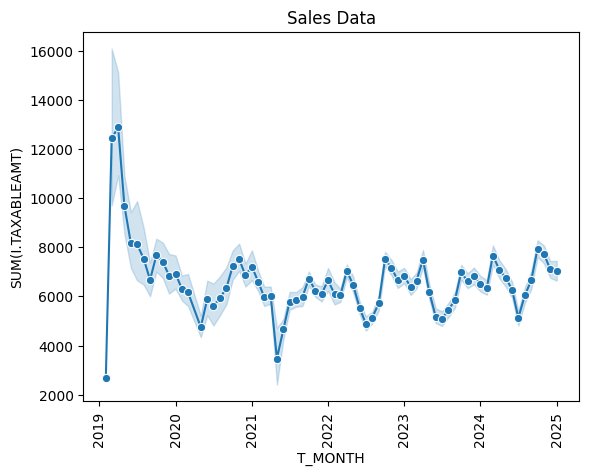

In [ ]:
#plot the time series data
sns.lineplot(x = 'T_MONTH', y = 'SUM(I.TAXABLEAMT)', data = df, marker = 'o')
plt.title('Sales Data')
plt.xticks(rotation = 90)
plt.show()

##**Stationarity Analysis**

we will perform tests on the time series data to understand whether it is stationary or not. The autoregressive modeling requires the time series data to be stationary. To test this, we will use the following test:

**Augmented Dickey–Fuller (ADF) test**

In [ ]:
#ADF test
from statsmodels.tsa.stattools import adfuller

Note that the null hypothesis for the ADF test is The time series is not stationary.

In [ ]:
#Using the ADF test to check for the stationarity of the 'SUM(I.TAXABLEAMT)' column
adf_test_result = adfuller(df['SUM(I.TAXABLEAMT)'])
print(adf_test_result[1])

0.0


If the  p -value is <  0.05 , then our data is stationary otherwise our data is non-stationary. Here its clearly visible the data is non stationary.

We have analyzed our time series data. Let's now split the data into training and testing sets so that we're ready to build and evaluate time series models on the data.

In [ ]:
# Split the data into training and testing data sets
df_train = df[0:63]  #first 63 months as training data

In [ ]:
df_test = df[63:]  #last 9 months for testing purpose

In [ ]:
# Group by T_MONTH and aggregate the sales (SUM(I.TAXABLEAMT)) per month
df_new = df.groupby(df.index).agg({'SUM(I.TAXABLEAMT)': 'sum'})

df_new.head()


,SUM(I.TAXABLEAMT)
T_MONTH,
2019-02-28,2674.10
2019-03-31,6563212.66
2019-04-30,15335678.73
2019-05-31,18012171.72
2019-06-30,12537502.99


In [ ]:
df_new.shape

(72, 1)

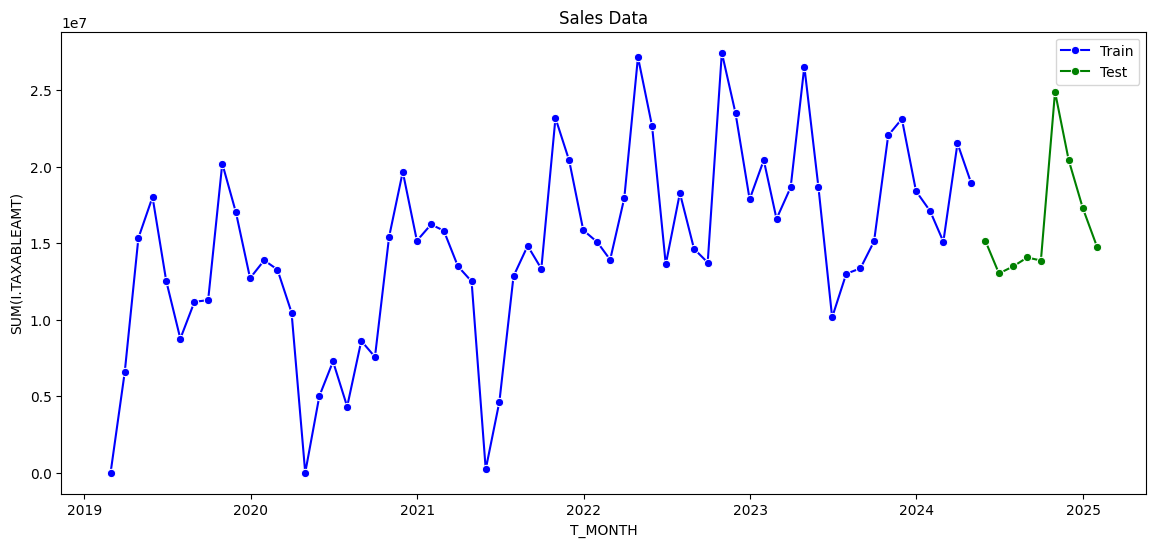

In [ ]:
df_train = df[0:63]
df_test = df[63:]
#Plot the time series data with the train test split
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'T_MONTH', y = 'SUM(I.TAXABLEAMT)', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = df_test, x = 'T_MONTH', y = 'SUM(I.TAXABLEAMT)', marker = 'o', color = 'green', label = 'Test')
plt.title('Sales Data');

Time Series Transformations
Now we will transform the time series data so that it ends up having a more stationary mean and variance. To do this, we will use the following data transformations:

**1. Box-Cox transformation**

**2. Differencing**

Box-Cox transformation is used to make the variance of a time series stationary and differencing is used to make its mean stationary. Note that although these methods can be executed in any order, differencing is done after Box-Cox transformation in general.

In [ ]:
from scipy.stats import boxcox

In [ ]:
#Use the 'boxcox' method to transform the 'Sales' variable
df_boxcox = pd.Series(boxcox(df_train['SUM(I.TAXABLEAMT)'], lmbda = 0), index = df_train.index)

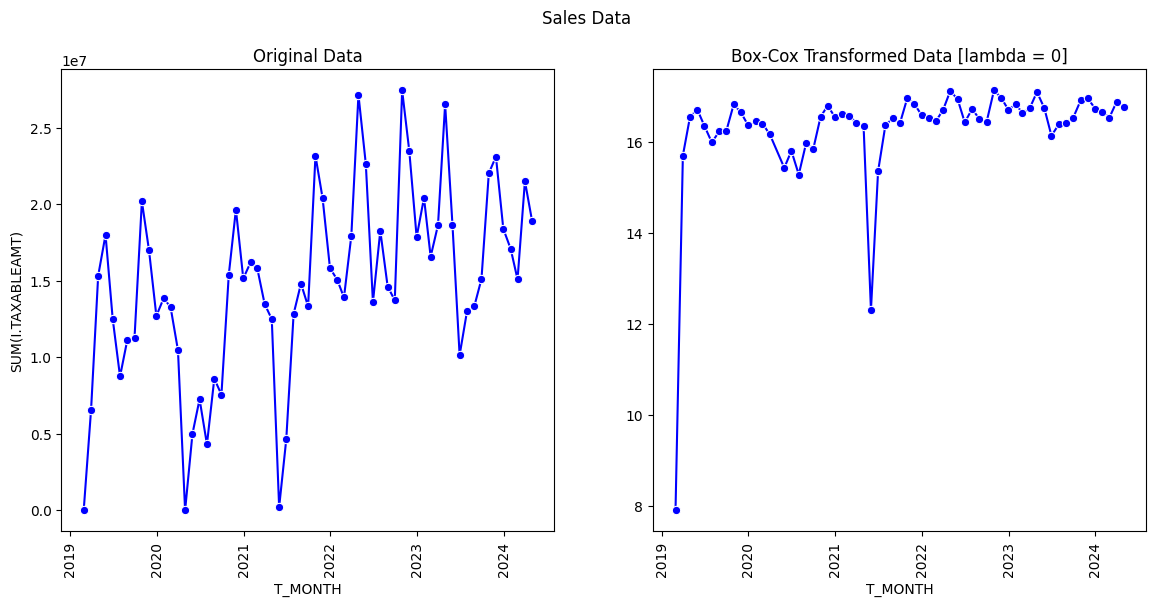

In [ ]:
# Plot the original time series data and its Box-Cox transformed version
plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data = df_train, x = 'T_MONTH', y = 'SUM(I.TAXABLEAMT)', marker = 'o', color = 'blue')
plt.xticks(rotation = 90)
plt.title('Original Data')

plt.subplot(1, 2, 2)
sns.lineplot(x = df_boxcox.index, y = df_boxcox.values, marker = 'o', color = 'blue')
plt.xticks(rotation = 90)
plt.title('Box-Cox Transformed Data [lambda = 0]')

plt.suptitle('Sales Data');

**Differencing**

Differencing is used to stabilize the mean of a time series. It involves taking the difference of consecutive data points in the time series. If this process is executed once, it is known as first-order differencing. If done twice, it is called second-order differencing. And so on.



In [ ]:
# Obtain the first-order differenced version of the time series data
df_differenced = df['SUM(I.TAXABLEAMT)'] - df['SUM(I.TAXABLEAMT)'].shift()

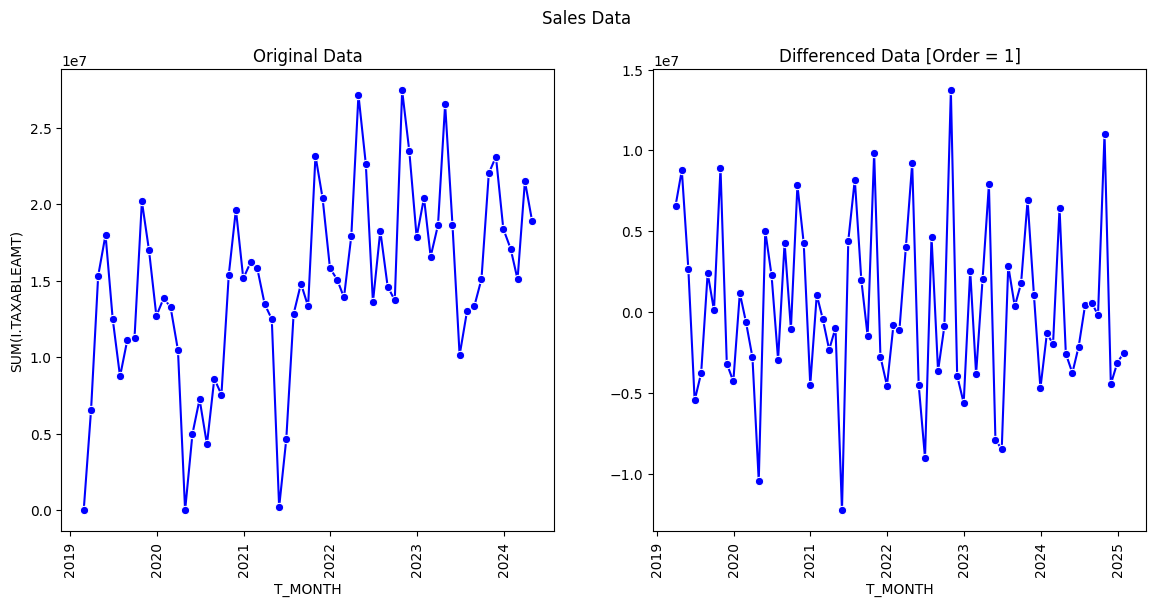

In [ ]:
# Plot the original time series data and its first-order differenced version
plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data = df_train, x = 'T_MONTH', y = 'SUM(I.TAXABLEAMT)', marker = 'o', color = 'blue')
plt.xticks(rotation = 90)
plt.title('Original Data')

plt.subplot(1, 2, 2)
sns.lineplot(x = df_differenced.index, y = df_differenced.values, marker = 'o', color = 'blue')
plt.xticks(rotation = 90)
plt.title('Differenced Data [Order = 1]')

plt.suptitle('Sales Data');

##**Transformed Time Series Data**

We will now apply the Box-Cox and the differencing transformations on the training data so that the data is ready for autoregressive time series modeling.

In [ ]:
# Apply the Box-Cox and differencing transformations on the training data
df_boxcox = pd.Series(boxcox(df_train['SUM(I.TAXABLEAMT)'], lmbda = 0), index = df_train.index)
df_boxcox_diff = df_boxcox - df_boxcox.shift()

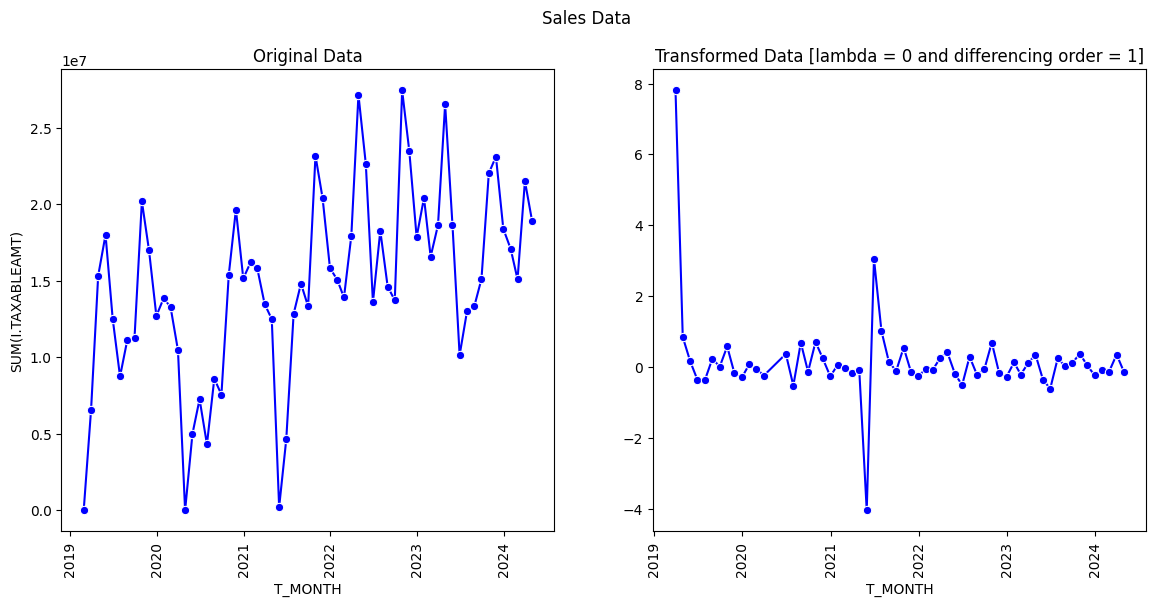

In [ ]:
# Plot the original time series data and its transformed version
plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data = df_train, x = 'T_MONTH', y = 'SUM(I.TAXABLEAMT)', marker = 'o', color = 'blue')
plt.xticks(rotation = 90)
plt.title('Original Data')

plt.subplot(1, 2, 2)
sns.lineplot(x = df_boxcox_diff.index, y = df_boxcox_diff.values, marker = 'o', color = 'blue')
plt.xticks(rotation = 90)
plt.title('Transformed Data [lambda = 0 and differencing order = 1]')

plt.suptitle('Sales Data');

We can run ADF test on df_boxcox_diff to check if it has flattened or not

##**Autocorrelation Plots**

###**1. Autocorrelation Function (ACF) Plot**
The autocorrelation function (ACF) plot shows the autocorrelation values of a time series for different lag orders

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

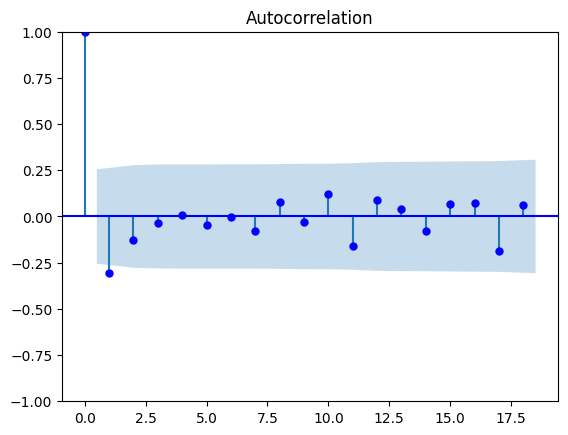

In [ ]:
# Note: Since differencing results in a missing value at the beginning, we must exclude it
plot_acf(x = df_boxcox_diff[1:], color = 'blue');

We can see an autocorrelation value at lag order = 1 .
ACF measures the correlation between a time series with its lagged values.

###**2. Partial Autocorrelation Function (PACF) Plot**

The partial autocorrelation fucntion (PACF) plot shows the partial autocorrelation values of a time series for different lag orders. Partial autocorrelation is computed such that it ignores short-term correlations in the data.

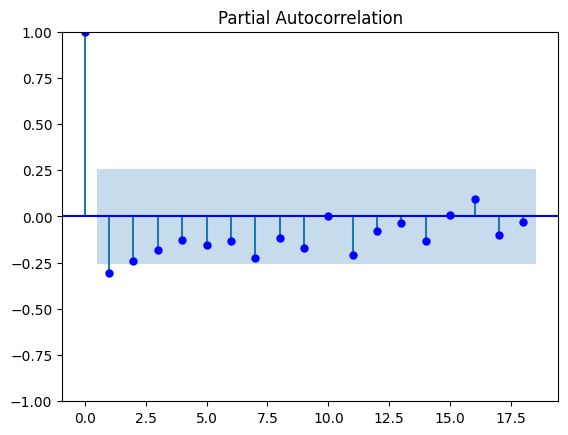

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(x = df_boxcox_diff[1:], color = 'blue');


##**AUTO REGRESSIVE MODELS**

1. Autoregressive

2. ARIMA (Autoregressive Integrated Moving Average)
3. SARIMA (Seasonal Autoregressive Integrated Moving Average)

###**1. Autoregressive Method**

In [ ]:
#Importing ARIMA
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
ar_model= ARIMA(df_boxcox_diff, order = (1, 0, 0))
ar_model_fit = ar_model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Obtain predictions from the AR model for the testing data indices
train_len = len(df_train)
ar_model_preds = ar_model_fit.predict(params=ar_model_fit.params, start=train_len, end=len(df_boxcox_diff)-1)


ValueError: Prediction must have `end` after `start`.